<a href="https://colab.research.google.com/github/SamuelMiller413/Deep-Learning-Course/blob/main/DL10_Introduction_to_Convolutional_Neural_Nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import torch
from torch import nn
import torch.nn.functional as F
import torchvision as tv

from PIL import Image
import requests
from io import BytesIO

import matplotlib.pyplot as plt

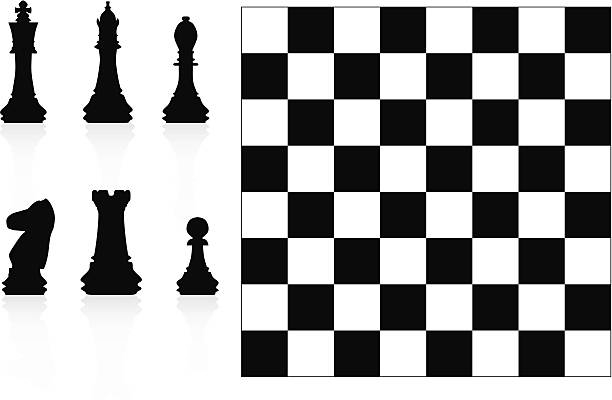

In [55]:
url = 'https://media.istockphoto.com/vectors/chess-silhouettes-vector-id165635822?b=1&k=20&m=165635822&s=612x612&w=0&h=pmf6FVa--nzyWCKb0SyTkIi3xdaHaamJuaR-FIjw1iI='
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('L')
img

In [56]:
to_tensor = tv.transforms.ToTensor()
to_image = tv.transforms.ToPILImage()

In [57]:
img_tensor = (
    to_tensor(img) # Convert to tensor
    .unsqueeze(0) # Add a batch dimension
    / 255. # Scale between 0 and 1.
)
img_tensor.shape

torch.Size([1, 1, 400, 612])

In [58]:
vertical_filter = torch.tensor([
    [1., 0, -1],
    [1., 0, -1],
    [1., 0, -1],
]).unsqueeze(0).unsqueeze(0)

## Trying Scharr Filter
# vertical_filter = torch.tensor([
#     [3, 0, -3],
#     [10, 0, -10],
#     [3, 0, -3],
# ]).unsqueeze(0).unsqueeze(0)

In [59]:
vert_output = F.conv2d(img_tensor, vertical_filter).squeeze()
vert_image = to_image(vert_output)

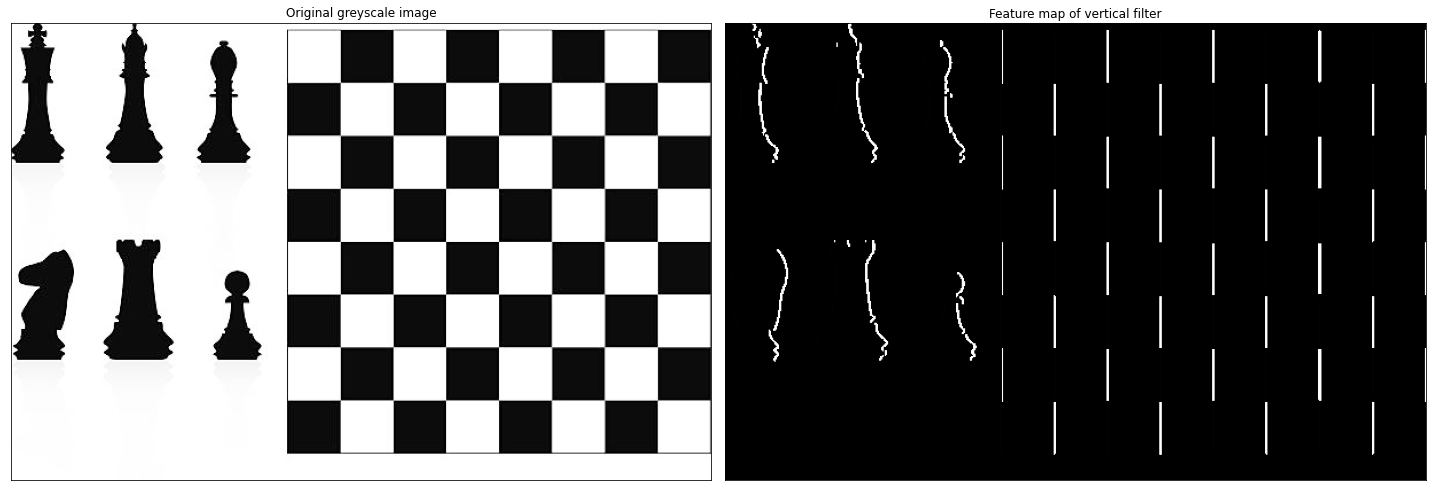

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(img, cmap='Greys_r')
axes[0].set_title('Original greyscale image')
axes[1].imshow(vert_image, cmap='Greys_r')
axes[1].set_title('Feature map of vertical filter')
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()

# Exercise 10.1

Use what you learned in this lesson to create a horizontal feature map.
The result of this exercise should be an edge detector that detects the top edges of the chess pieces and squares on the board.

Then, use the `F.conv2d` to apply the filter.

<!-- startquestion -->

In [61]:
# Your code here
horizontal_filter = torch.tensor([
    [1., 1., 1.],
    [0, 0, 0],
    [-1, -1, -1],
]).unsqueeze(0).unsqueeze(0)

# # trying sharr filter
# horizontal_filter = torch.tensor([
#     [3, 10, 3],
#     [0, 0, 0],
#     [-3, -10, -3],
# ]).unsqueeze(0).unsqueeze(0)


horizontal_tensor = (
    to_tensor(img) # Convert to tensor
    .unsqueeze(0) # Add a batch dimension
    / 255. # Scale between 0 and 1.
)


print(img_tensor.shape)
horizontal_output = F.conv2d(img_tensor, horizontal_filter).squeeze()
horizontal_image = to_image(horizontal_output)



torch.Size([1, 1, 400, 612])


In [62]:
assert horizontal_filter.ndim == 4

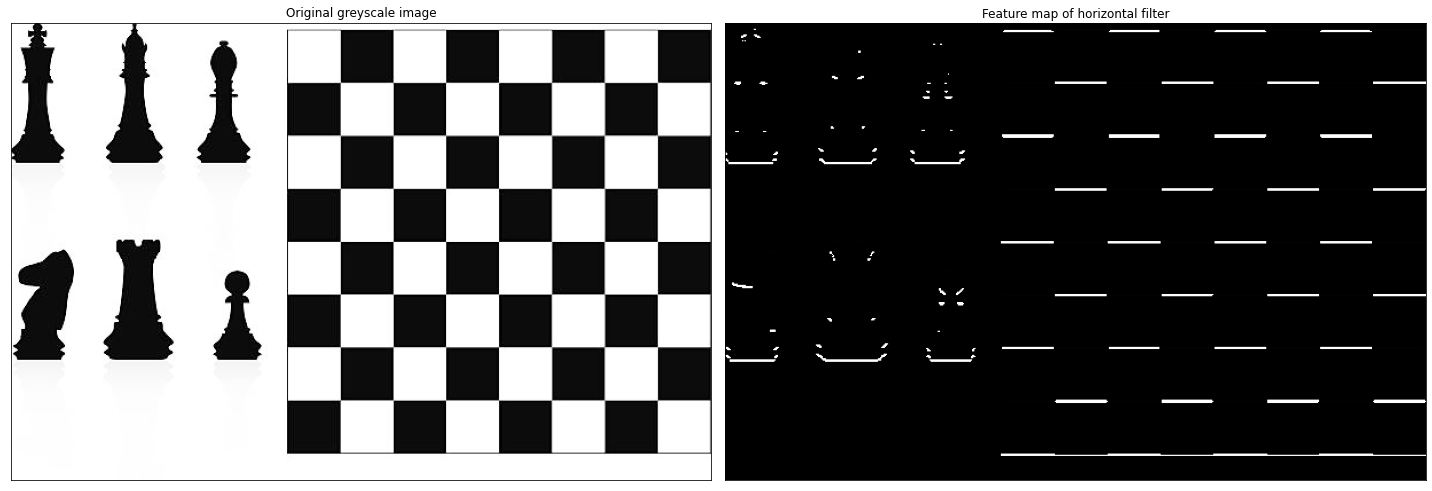

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(img, cmap='Greys_r')
axes[0].set_title('Original greyscale image')
axes[1].imshow(horizontal_image, cmap='Greys_r')
axes[1].set_title('Feature map of horizontal filter')
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()

In [64]:
two_filters = torch.cat([vertical_filter, horizontal_filter], dim=0)
two_filters.shape

torch.Size([2, 1, 3, 3])

In [65]:
two_filter_output = F.conv2d(img_tensor, two_filters)
two_filter_output.shape

torch.Size([1, 2, 398, 610])

In [66]:
# unpack the filters into their own tensors
vert_output, horizontal_output = two_filter_output.squeeze() 
# convert tensors to images
vert_image = to_image(vert_output.squeeze())
horizontal_image = to_image(horizontal_output.squeeze())

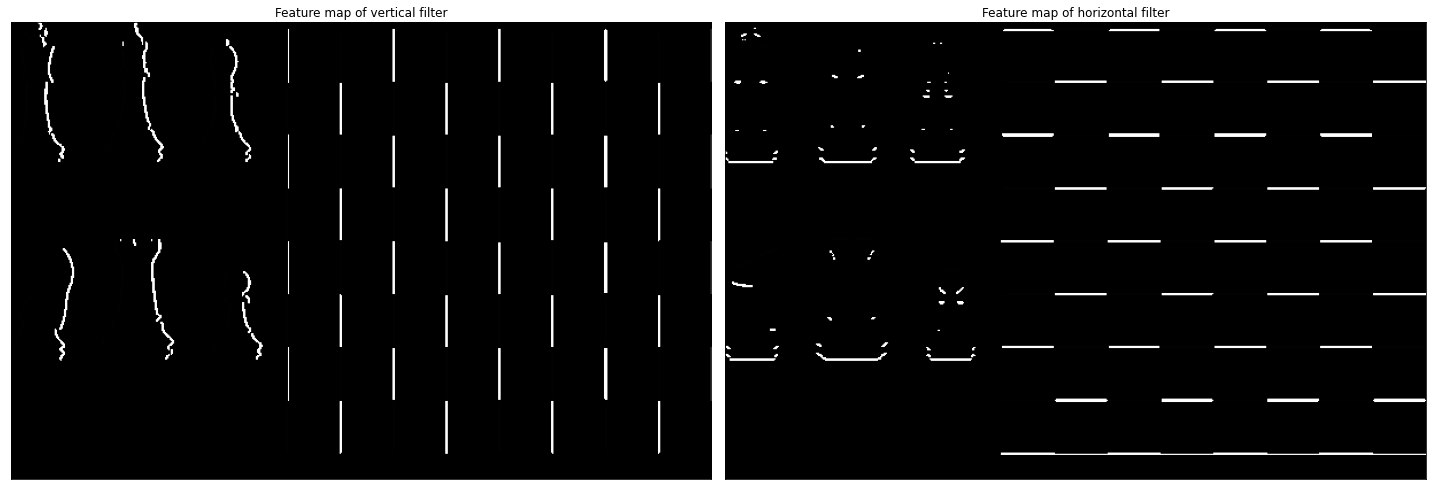

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(vert_image, cmap='Greys_r')
axes[0].set_title('Feature map of vertical filter')
axes[1].imshow(horizontal_image, cmap='Greys_r')
axes[1].set_title('Feature map of horizontal filter')
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()

In [68]:
zero_pad = nn.ZeroPad2d(30)
reflection_pad = nn.ReflectionPad2d(30)

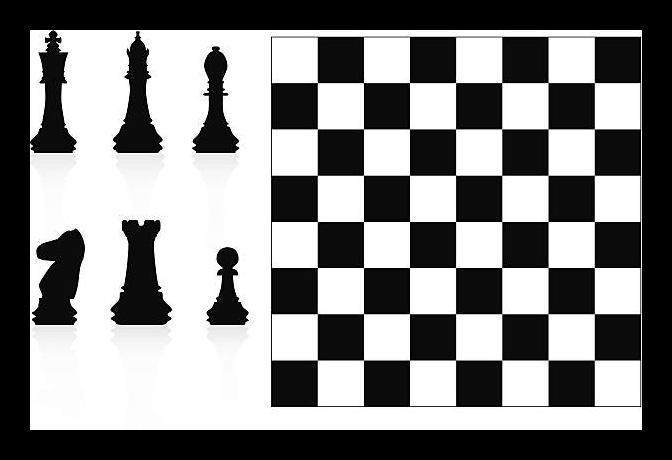

In [69]:
to_image(zero_pad(img_tensor).squeeze() * 255)

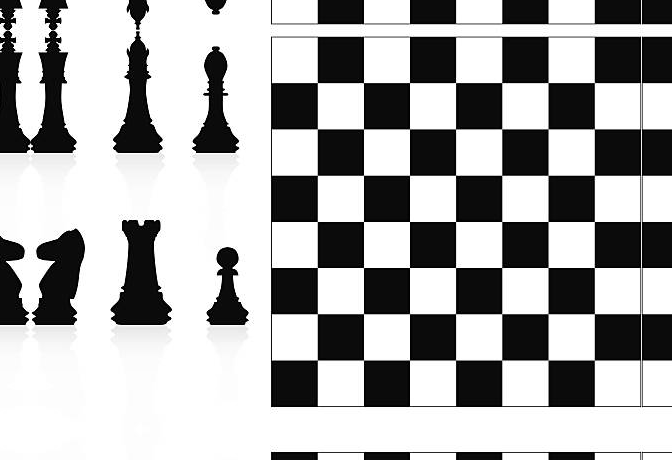

In [70]:
to_image(reflection_pad(img_tensor).squeeze() * 255)

In [71]:
assert img_tensor.shape == F.conv2d(img_tensor, vertical_filter, padding='same').shape
assert img_tensor.shape == F.conv2d(img_tensor, vertical_filter, padding=1).shape
assert not img_tensor.shape == F.conv2d(img_tensor, vertical_filter).shape

In [72]:
img_tensor.shape

torch.Size([1, 1, 400, 612])

In [73]:
F.conv2d(img_tensor, vertical_filter, padding=1, stride=1).shape

torch.Size([1, 1, 400, 612])

In [75]:
F.conv2d(img_tensor, vertical_filter, padding=1, stride=2).shape

torch.Size([1, 1, 200, 306])

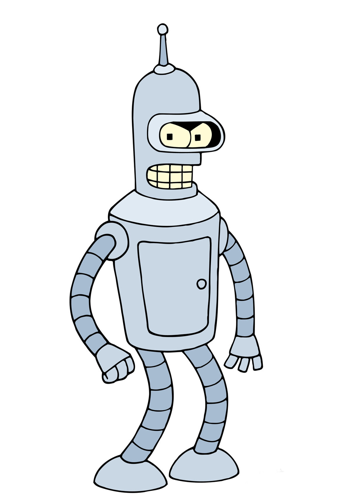

In [76]:
url = 'https://www.syfy.com/sites/syfy/files/styles/scale--1200/public/cast_futurama_bender_0.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content)).resize((350, 500))
img

In [77]:
img_tensor = to_tensor(img).unsqueeze(0)
img_tensor.shape

torch.Size([1, 3, 500, 350])

# Exercise 10.2

Instead of explicitly defining filters, we'll just use random numbers this time.
Based on the `F.conv2d` documentation, the filters should be of shape `(out_channels, in_channels, kernel/filter_height, kernel/filter_width)`.

Complete the code in the cell below to create a filter with a 3x3 kernel that takes in a 3-channel image and returns a 16-channel feature map.
We will use `F.conv2d` to generate the feature map.

<!-- startquestion -->

In [83]:
out_channels = 16
in_channels = 3
kH = 3
kW = 3
try:
    random_filters = torch.rand((out_channels, in_channels, kH, kW))
    print(random_filters.shape)
except:
    print('Please assign out_channels, in_channels, kH, and kW.')

torch.Size([16, 3, 3, 3])


In [84]:
outputs = F.conv2d(img_tensor, random_filters, padding=1, stride=1)

In [85]:
assert outputs.shape[1] == 16

In [86]:
conv_kwargs = {
    'padding': 1,
    'stride': 1
}

conv_layer = nn.Conv2d(3, 16, 3, **conv_kwargs)

In [87]:
conv_layer_output = conv_layer(img_tensor)
conv_layer_output.shape

torch.Size([1, 16, 500, 350])

In [88]:
conv_function_output = F.conv2d(img_tensor, conv_layer.weight.data, conv_layer.bias.data, **conv_kwargs)

In [89]:
assert (conv_function_output == conv_layer_output).all()

In [90]:
maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
avgpool = nn.AvgPool2d(kernel_size=2, stride=2)

In [91]:
print(f"""
Oringinal image shape: {img_tensor.shape}
Max pool tensor shape: {maxpool(img_tensor).shape}
Avg pool tensor shape: {avgpool(img_tensor).shape}
""")


Oringinal image shape: torch.Size([1, 3, 500, 350])
Max pool tensor shape: torch.Size([1, 3, 250, 175])
Avg pool tensor shape: torch.Size([1, 3, 250, 175])



In [92]:
conv_stride_2 = nn.Conv2d(3, 3, 3, 2, 1)
conv_then_pool = nn.Sequential(
    nn.Conv2d(3, 3, 3, 1, 1),
    nn.MaxPool2d(2, 2)
)

In [94]:
print(f"""
Shape of conv with a stride of 2: {conv_stride_2(img_tensor).shape}
Shape of conv with a pooling layer: {conv_then_pool(img_tensor).shape}
""")


Shape of conv with a stride of 2: torch.Size([1, 3, 250, 175])
Shape of conv with a pooling layer: torch.Size([1, 3, 250, 175])



In [95]:
adapt_avg_pool = nn.AdaptiveAvgPool2d(1)
adapt_max_pool = nn.AdaptiveMaxPool2d(1)

In [96]:
outputs.shape

torch.Size([1, 16, 500, 350])

In [97]:
adapt_avg_pool(outputs).shape

torch.Size([1, 16, 1, 1])

In [98]:
adapt_pool_with_flatten = nn.Sequential(
    nn.AdaptiveMaxPool2d(1),
    nn.Flatten()
)

print(adapt_pool_with_flatten(outputs).shape)

torch.Size([1, 16])
